In [1]:
import numpy as np
import tensorflow as tf
from sklearn import datasets
from sklearn.cross_validation import train_test_split
import pylab as pl
from IPython import display
import pandas as pd
import sys
%matplotlib inline

/home/ankit/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def getFeatures(df):
    window_size = 1000
    total_batch = int(len(df)/window_size)
    trainX = pd.DataFrame()
    # Loop over all batches
    for i in range(total_batch):
        n = min(window_size, len(df)-i*window_size)
        df_win = df[i*window_size:i*window_size+n]
        group = df_win.groupby(['SrcAddr'])
        train_win = group.Sport.nunique()
        train_win = pd.DataFrame(train_win)
        train_win['udest_ip'] = group.DstAddr.nunique()
        train_win['udest_port'] = group.Dport.nunique()
        train_win['netflows'] = group.Dport.count()
        train_win['uproto'] = group.Proto.nunique()
        temp = group.Proto.value_counts().unstack().fillna(0)
        try:
            train_win['tcp'] = temp['tcp']
        except:
            train_win['tcp'] = group.Dport.count()*0
        try:
            train_win['udp'] = temp['udp']
        except:
             train_win['udp'] = group.Dport.count()*0
        train_win['bytes'] = group.TotBytes.sum()
        train_win['packets'] = group.TotPkts.sum()
        train_win['Label'] = (group.Label.sum()*1.0/group.Dport.count())> 0
        trainX = pd.concat([trainX,train_win],axis=0)    
    return trainX

In [3]:
import random

def somerows(x, n):
    return x.sample(n=n)

def selectFlows(filename):
    df = pd.read_csv(filename)
    df['Label'] = df.Label.str.contains("Botnet")
    dft = getFeatures(df)
    dfB = dft[dft['Label'] == True]
    dfN = dft[dft['Label'] == False]
    dfN = somerows(dfN,len(dfB))
#     print len(dfB)
#     print len(dfN)
    df = pd.concat([dfB,dfN],axis=0)   
    df = df.sample(frac=1).reset_index(drop=True)
    return df

def selectFlowsTest(filename):
    df = pd.read_csv(filename)
    df['Label'] = df.Label.str.contains("Botnet")
    df = getFeatures(df)
    return df

In [4]:
dfTrain = pd.DataFrame()
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/3/capture20110812.binetflow")
dfTrain = pd.concat([dfTrain,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/4/capture20110815.binetflow")
dfTrain = pd.concat([dfTrain,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/5/capture20110815-2.binetflow")
dfTrain = pd.concat([dfTrain,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/7/capture20110816-2.binetflow")
dfTrain = pd.concat([dfTrain,df1],axis=0) 
print len(dfTrain)
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/10/capture20110818.binetflow")
dfTrain = pd.concat([dfTrain,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/11/capture20110818-2.binetflow")
dfTrain = pd.concat([dfTrain,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/12/capture20110819.binetflow")
dfTrain = pd.concat([dfTrain,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/13/capture20110815-3.binetflow")
dfTrain = pd.concat([dfTrain,df1],axis=0) 


# df1 = pd.read_csv("/home/ankit/Desktop/MTP/working_directory/Binenetflow/ISCX_Botnet-Training.biargus.binetflow")
# #Add Label to flows
# df1['Label'] = pd.Series(np.zeros(len(df1['Dur'])), index=df1.index)
# malicious_ips = "192.168.2.112 131.202.243.84 192.168.5.122 198.164.30.2 192.168.2.110 192.168.4.118 192.168.2.113 192.168.1.103 192.168.4.120 192.168.2.112 192.168.2.109 192.168.2.105 147.32.84.180 147.32.84.170 147.32.84.150 147.32.84.140 147.32.84.130 147.32.84.160 10.0.2.15 192.168.106.141 192.168.106.131 172.16.253.130 172.16.253.131 172.16.253.129 172.16.253.240 74.78.117.238 158.65.110.24 192.168.3.35 192.168.3.25 192.168.3.65 172.29.0.116 172.29.0.109 172.16.253.132 192.168.248.165 10.37.130.4"
# malicious_ips = malicious_ips.split()

# for i in malicious_ips:
#     df1.loc[df1["SrcAddr"] == i,"Label"] = 1

# df1 = getFeatures(df1)
# dfTrain = pd.concat([dfTrain,df1],axis=0) 
    
print len(dfTrain)

/home/ankit/anaconda2/lib/python2.7/site-packages/pandas/core/groupby.py:2930: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  inc = np.r_[1, val[1:] != val[:-1]]


3456
10712


In [5]:
dfTest = pd.DataFrame()
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/1/capture20110810.binetflow")
dfTest = pd.concat([dfTest,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/2/capture20110811.binetflow")
dfTest = pd.concat([dfTest,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/6/capture20110816.binetflow")
dfTest = pd.concat([dfTest,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/8/capture20110816-3.binetflow")
dfTest = pd.concat([dfTest,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/9/capture20110817.binetflow")
dfTest = pd.concat([dfTest,df1],axis=0)


# df1 = pd.read_csv("/home/ankit/Desktop/MTP/working_directory/Binenetflow/ISCX_Botnet-Testing.biargus.binenetflow")
# #Add Label to flows
# df1['Label'] = pd.Series(np.zeros(len(df1['Dur'])), index=df1.index)
# malicious_ips = "192.168.2.112 131.202.243.84 192.168.5.122 198.164.30.2 192.168.2.110 192.168.4.118 192.168.2.113 192.168.1.103 192.168.4.120 192.168.2.112 192.168.2.109 192.168.2.105 147.32.84.180 147.32.84.170 147.32.84.150 147.32.84.140 147.32.84.130 147.32.84.160 10.0.2.15 192.168.106.141 192.168.106.131 172.16.253.130 172.16.253.131 172.16.253.129 172.16.253.240 74.78.117.238 158.65.110.24 192.168.3.35 192.168.3.25 192.168.3.65 172.29.0.116 172.29.0.109 172.16.253.132 192.168.248.165 10.37.130.4"
# malicious_ips = malicious_ips.split()

# for i in malicious_ips:
#     df1.loc[df1["SrcAddr"] == i,"Label"] = 1

# df1 = getFeatures(df1)
# dfTest = pd.concat([dfTest,df1],axis=0) 

print len(dfTest)

32400


In [6]:
def getXY(df):
    temp = pd.get_dummies(df.Label)
    temp = pd.DataFrame(temp)
    Y = temp.as_matrix()
    X = df.copy()
    del X['Label']
    X = (X - X.mean()) / (X.max() - X.min())
    X = X.as_matrix()
    return X,Y

In [7]:
trainX, trainY = getXY(dfTest)

testX, testY = getXY(dfTrain)

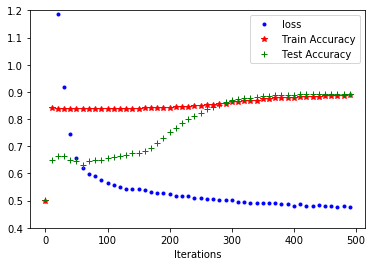

Iteration: 490 Loss: 0.477595062995 Train Accuracy: 0.88679 Test Accuracy: 0.893764 Optimization Finished!
('Accuracy:', 0.89376402)


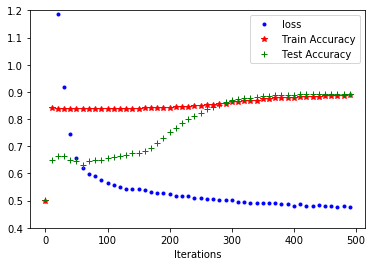

In [8]:
tf.reset_default_graph()
# Create model
def multilayer_perceptron(x, weights, biases,keep_prob):
    # Hidden layer with RELU activation
    layer_11 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_11 = tf.nn.sigmoid(layer_11)
    layer_11 = tf.nn.dropout(layer_11, keep_prob)
    layer_12 = tf.add(tf.matmul(x, weights['h2']), biases['b2'])
    layer_12 = tf.nn.tanh(layer_12)
    layer_12 = tf.nn.dropout(layer_12, keep_prob)
    layer_1 = tf.mul(layer_11, layer_12)
    layer_1 = tf.nn.sigmoid(layer_1)
    layer_1 = tf.nn.dropout(layer_1, keep_prob)
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return out_layer

#Parameters
learning_rate = 0.0001
training_epochs = 500
batch_size = 100
display_step = 10

#Network Parameters
n_hidden = 40

n_input = 9
n_classes = 2
# tf Graph input
with tf.name_scope('input'):
    x = tf.placeholder("float", [None, n_input],'x')
    y = tf.placeholder("float", [None, n_classes],'y')
    keep_prob = tf.placeholder(tf.float32)

# Store layers weight & bias
with tf.name_scope("weights"):
    weights = {
        'h1': tf.Variable(tf.random_normal([n_input, n_hidden]),name='wh1'),
        'h2': tf.Variable(tf.random_normal([n_input, n_hidden]),name='wh2'),
        'out': tf.Variable(tf.random_normal([n_hidden, n_classes]),name='wo')
        }
with tf.name_scope("biases"):
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden]),name='b1'),
        'b2': tf.Variable(tf.random_normal([n_hidden]),name='b2'),
        'out': tf.Variable(tf.random_normal([n_classes]),name='bo')
    }
# Construct model
with tf.name_scope("Model"):
    pred = multilayer_perceptron(x, weights, biases,keep_prob)

# Define loss and optimizer
with tf.name_scope("Cost"):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
with tf.name_scope('Optimizer'):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
# Initializing the variables
init = tf.initialize_all_variables()

# Test model
with tf.name_scope("accuracy"):
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# tf.scalar_summary("cost",cost)
# tf.scalar_summary("accuracy", accuracy)

# tf.histogram_summary("weight1",weights['h1'])
# tf.histogram_summary("weight2",weights['h2'])
# tf.histogram_summary("weighto",weights['out'])
# tf.histogram_summary("bias1",biases['b1'])
# tf.histogram_summary("bias2",biases['b2'])
# tf.histogram_summary("biaso",biases['out'])

# summary_op = tf.merge_all_summaries()
#Launch the graph
sess = tf.InteractiveSession()
# writer = tf.train.SummaryWriter("./logs/nn_logs",sess.graph)
sess.run(init)
# Training cycle
for epoch in range(training_epochs):
    avg_cost = 0.
    total_batch = int(len(trainX)/batch_size)
    # Loop over all batches
    for i in range(total_batch):
        n = min(batch_size, len(trainX)-i*batch_size)
        batch_x = trainX[i*batch_size:i*batch_size+n]
        batch_y = trainY[i*batch_size:i*batch_size+n]
        # Run optimization op (backprop) and cost op (to get loss value)
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,y: batch_y,keep_prob : 0.5})
        # Compute average loss
        avg_cost += c / total_batch
    # Display logs per epoch step
    if epoch % display_step == 0:
        #Write summary
#         summary = sess.run([summary_op], feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
#         writer.add_summary(summary[0], epoch)
        # Calculate batch accuracy
        Train_accuracy = accuracy.eval({x: trainX, y: trainY, keep_prob : 1.0})
        # Calculate batch loss
        loss = avg_cost
        Test_accuracy=accuracy.eval({x: testX, y: testY,keep_prob : 1.0})    
        pl.plot([epoch],loss,'b.',label='loss' if epoch == 0 else "")
        pl.plot([epoch],Train_accuracy,'r*',label='Train Accuracy' if epoch == 0 else "")
        pl.plot([epoch],Test_accuracy,'g+',label='Test Accuracy'if epoch == 0 else "")
        pl.legend(loc='bottom right')
        pl.xlabel('Iterations')
        pl.ylim(0.4, 1.2)
        display.clear_output(wait=True)
        display.display(pl.gcf())   
        sys.stdout.flush()
        print("\rIteration: %s Loss: %s Train Accuracy: %s Test Accuracy: %s"%(epoch,loss,Train_accuracy,Test_accuracy)),
        sys.stdout.flush()
print("Optimization Finished!")
    
print("Accuracy:", accuracy.eval({x: testX, y: testY,keep_prob : 1.0}))
prediction=tf.argmax(pred,1)
out =  prediction.eval(feed_dict={x: testX,keep_prob : 1.0})

In [9]:
from sklearn.metrics import confusion_matrix
print confusion_matrix(out, np.argmax(testY,1)) #0 = normal

[[4984  766]
 [ 372 4590]]


In [10]:
dfT = pd.DataFrame()
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/1/capture20110810.binetflow")
dfT = pd.concat([dfT,df1],axis=0) 
tX, tY = getXY(dfT)

print("Accuracy:", accuracy.eval({x: tX, y: tY,keep_prob : 1.0}))
prediction=tf.argmax(pred,1)
out =  prediction.eval(feed_dict={x: tX,keep_prob : 1.0})
print confusion_matrix(out, np.argmax(tY,1))

('Accuracy:', 0.91710973)
[[2004  278]
 [  65 1791]]


In [11]:
dfT = pd.DataFrame()
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/2/capture20110811.binetflow")
dfT = pd.concat([dfT,df1],axis=0) 
tX, tY = getXY(dfT)

print("Accuracy:", accuracy.eval({x: tX, y: tY,keep_prob : 1.0}))
prediction=tf.argmax(pred,1)
out =  prediction.eval(feed_dict={x: tX,keep_prob : 1.0})
print confusion_matrix(out, np.argmax(tY,1))

('Accuracy:', 0.88766521)
[[1319  263]
 [  43 1099]]


In [12]:
dfT = pd.DataFrame()
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/6/capture20110816.binetflow")
dfT = pd.concat([dfT,df1],axis=0) 
tX, tY = getXY(dfT)

print("Accuracy:", accuracy.eval({x: tX, y: tY,keep_prob : 1.0}))
prediction=tf.argmax(pred,1)
out =  prediction.eval(feed_dict={x: tX,keep_prob : 1.0})
print confusion_matrix(out, np.argmax(tY,1))

('Accuracy:', 0.84434968)
[[422  99]
 [ 47 370]]


In [13]:
dfT = pd.DataFrame()
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/8/capture20110816-3.binetflow")
dfT = pd.concat([dfT,df1],axis=0) 
tX, tY = getXY(dfT)

print("Accuracy:", accuracy.eval({x: tX, y: tY,keep_prob : 1.0}))
prediction=tf.argmax(pred,1)
out =  prediction.eval(feed_dict={x: tX,keep_prob : 1.0})
print confusion_matrix(out, np.argmax(tY,1))

('Accuracy:', 0.62445885)
[[1288  943]
 [  98  443]]


In [14]:
dfT = pd.DataFrame()
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/9/capture20110817.binetflow")
dfT = pd.concat([dfT,df1],axis=0) 
tX, tY = getXY(dfT)

print("Accuracy:", accuracy.eval({x: tX, y: tY,keep_prob : 1.0}))
prediction=tf.argmax(pred,1)
out =  prediction.eval(feed_dict={x: tX,keep_prob : 1.0})
print confusion_matrix(out, np.argmax(tY,1))

('Accuracy:', 0.94658238)
[[10318   570]
 [  596 10344]]


In [15]:
sess.close()